In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.metrics.pairwise import cosine_similarity

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')
path_market = os.path.join('/content/gdrive/My Drive/datasets_codenation/',
                          'estaticos_market.csv')
path_portfolio1 = os.path.join('/content/gdrive/My Drive/datasets_codenation/',
                          'estaticos_portfolio1.csv')
path_portfolio2 = os.path.join('/content/gdrive/My Drive/datasets_codenation/',
                          'estaticos_portfolio2.csv')
path_portfolio3 = os.path.join('/content/gdrive/My Drive/datasets_codenation/',
                          'estaticos_portfolio3.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
pd.set_option('display.max_rows', 200)

In [0]:
df_market = pd.read_csv(path_market, index_col=0)
df_portfolio1 = pd.read_csv(path_portfolio1, usecols=['id'])
df_portfolio2 = pd.read_csv(path_portfolio2, index_col=0)
df_portfolio3 = pd.read_csv(path_portfolio3, index_col=0)

In [0]:
# Apply threshold for dropping NaNs with more than 60%

removed_columns = []
null_count = df_market.isna().sum()
percent = null_count/df_market.shape[0]
for col in df_market.iloc[:, 1:]:
    if df_market[col].isna().sum()/df_market[col].shape[0] > 0.6:
        removed_columns.append(col)

new_columns = list(set(df_market.columns) - set(removed_columns))
df_market = df_market.loc[:, new_columns]

In [0]:
# Splitting between ID and variables
df_id = df_market['id']
df_dummy = df_market.drop('id',axis=1)

In [0]:
# Fix True/False objects
df_dummy['fl_passivel_iss'] = df_dummy['fl_passivel_iss'].astype('bool')
df_dummy['fl_antt'] = df_dummy['fl_antt'].astype('bool')
df_dummy['fl_spa'] = df_dummy['fl_spa'].astype('bool')
df_dummy['fl_simples_irregular'] = df_dummy['fl_simples_irregular'].astype('bool')
df_dummy['fl_veiculo'] = df_dummy['fl_veiculo'].astype('bool')

In [0]:
# Filling NaNs in the rest of the Dataset

df_dummy['empsetorcensitariofaixarendapopulacao'] = df_dummy['empsetorcensitariofaixarendapopulacao'].fillna(
    df_dummy['empsetorcensitariofaixarendapopulacao'].mean()) # oreenchendo com a media
df_dummy['sg_uf_matriz'] = df_dummy['sg_uf_matriz'].fillna('outro')
df_dummy['qt_socios_st_regular'] = df_dummy['qt_socios_st_regular'].fillna(
    df_dummy['qt_socios_st_regular'].mean()) 
df_dummy['empsetorcensitariofaixarendapopulacao'] = df_dummy['empsetorcensitariofaixarendapopulacao'].fillna(
    df_dummy['empsetorcensitariofaixarendapopulacao'].median())
df_dummy['nm_divisao'] = df_dummy['nm_divisao'].fillna('COMERCIO VAREJISTA')
df_dummy['vl_total_veiculos_leves_grupo'] = df_dummy['vl_total_veiculos_leves_grupo'].fillna(0)
df_dummy['vl_faturamento_estimado_aux'] = df_dummy['vl_faturamento_estimado_aux'].fillna(
    df_dummy['vl_faturamento_estimado_aux'].median())
df_dummy['idade_minima_socios'] = df_dummy['idade_minima_socios'].fillna(
    df_dummy['idade_minima_socios'].mean())
df_dummy['fl_optante_simples'] = df_dummy['fl_optante_simples'].fillna(True) # possui 20mil leituras a mais, o que pode ser uma fonte de erro
df_dummy['nm_segmento'] = df_dummy['nm_segmento'].fillna('OUTRAS ATIVIDADES DE SERVICOS')
df_dummy['qt_socios_pj'] = df_dummy['qt_socios_pj'].fillna(0) 
df_dummy['nm_meso_regiao'] = df_dummy['nm_meso_regiao'].fillna('OUTRO') 
df_dummy['fl_optante_simei'] = df_dummy['fl_optante_simei'].fillna(True) # maioria
df_dummy['vl_faturamento_estimado_grupo_aux'] = df_dummy['vl_faturamento_estimado_grupo_aux'].fillna(
    df_dummy['vl_faturamento_estimado_grupo_aux'].mean()) # distribuição com muita assimetria
df_dummy['de_saude_tributaria'] = df_dummy['de_saude_tributaria'].fillna('VERDE') # assume-se que, ao nao preencher, esta no verde
df_dummy['de_saude_rescencia'] = df_dummy['de_saude_rescencia'].fillna('ACIMA DE 1 ANO')
df_dummy['idade_maxima_socios'] = df_dummy['idade_maxima_socios'].fillna(df_dummy['idade_maxima_socios'].mean())
df_dummy['vl_total_veiculos_pesados_grupo'] = df_dummy['vl_total_veiculos_pesados_grupo'].fillna(0) 
df_dummy['qt_socios_pf'] = df_dummy['qt_socios_pf'].fillna(df_dummy['qt_socios_pf'].median())
df_dummy['qt_socios_masculino'] = df_dummy['qt_socios_masculino'].fillna(
    df_dummy['qt_socios_masculino'].median()) # talvez preencher com 0 seja melhor
df_dummy['qt_socios'] = df_dummy['qt_socios'].fillna(
    df_dummy['qt_socios'].median())
df_dummy['de_faixa_faturamento_estimado'] = df_dummy['de_faixa_faturamento_estimado'].fillna(
    'DE R$ 81.000,01 A R$ 360.000,00')
df_dummy['nm_micro_regiao'] = df_dummy['nm_micro_regiao'].fillna('NAO ESPECIFICADO')
df_dummy['idade_media_socios'] = df_dummy['idade_media_socios'].fillna(df_dummy['idade_media_socios'].median())
df_dummy['setor'] = df_dummy['setor'].fillna('COMERCIO')
df_dummy['nu_meses_rescencia'] = df_dummy['nu_meses_rescencia'].fillna(df_dummy['nu_meses_rescencia'].mean())
df_dummy['de_faixa_faturamento_estimado_grupo'] = df_dummy['de_faixa_faturamento_estimado_grupo'].fillna(
    'DE R$ 81.000,01 A R$ 360.000,00')
df_dummy['de_nivel_atividade'] = df_dummy['de_nivel_atividade'].fillna('MEDIA')
df_dummy['dt_situacao'] = df_dummy['dt_situacao'].fillna('2005-11-03')

In [21]:
# Check to see if there are any NaN cell left
df_dummy.isna().any().sum()

0

In [0]:
# Define a "dummyfied" DataFrame without object columns with too many readings - "macro" approach

df_new = pd.get_dummies(df_dummy.drop(['nm_micro_regiao','dt_situacao','de_natureza_juridica',
                                       'de_ramo','nm_meso_regiao','nm_divisao'],
                                      axis=1),sparse=True,drop_first=True)

In [0]:
from sklearn.cluster import KMeans

# Define function to evaluate through the elbow method the optimal number of clusters

def kmeans_elbow(number_of_clusters, data):
    model = KMeans(n_clusters = number_of_clusters, n_jobs=4)
    model.fit(data)
    return [number_of_clusters, model.inertia_]


## Methods to test

**1st  approach**: Dummyfied data

**2nd  approach**: Dummyfied and scaled data


**3rd  approach**: Ordinal encoded and unscaled data

**4th approach**: Ordinal encoded and scaled data

In [0]:
# 1st approach - Dummyfied, unscaled data

#first_approach = []
#for i in range(5,12):
#    first_approach.append(kmeans_elbow(i, df_new))

In [0]:
#sns.lineplot(x=pd.DataFrame(first_approach)[0],
#             y=pd.DataFrame(first_approach)[1])

In [0]:
# 2nd approach - Dummyfied, scaled data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_new)

In [0]:
#second_approach = []
#for i in range(5,20):
#    first_approach.append(kmeans_elbow(i, df_scaled))

In [0]:
#sns.lineplot(x=pd.DataFrame(second_approach)[0],
 #            y=pd.DataFrame(second_approach)[1])

In [29]:
!pip3 install category_encoders

In [0]:
# 3rd approach - Ordinal encoded, unscaled data

from category_encoders.ordinal import OrdinalEncoder

df_ord = df_dummy.drop(['nm_micro_regiao','dt_situacao','de_natureza_juridica',
                                       'de_ramo','nm_meso_regiao','nm_divisao'],
                                      axis=1)
cols_to_ord = []
for col in df_ord:
    if df_ord[col].dtypes == np.object:
        cols_to_ord.append(col)

enc = OrdinalEncoder(cols=cols_to_ord)

df_ord = enc.fit_transform(df_ord)

In [0]:
#third_approach = []
#for i in range(5,20):
#    third_approach.append(kmeans(i, df_ord))
#    
#sns.lineplot(x=pd.DataFrame(third_approach)[0],
#             y=pd.DataFrame(third_approach)[1])

In [0]:
# 4th approach - Ordinal encoded, scaled data

df_ord_scaled = scaler.fit_transform(df_ord)

In [0]:
fourth_approach = []
for i in range(20,25):
    fourth_approach.append(kmeans_elbow(i, df_ord_scaled))

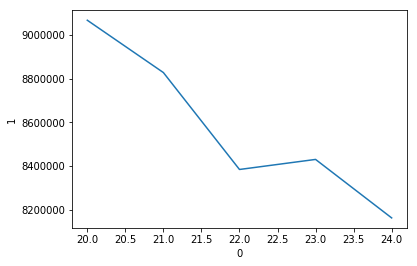

In [64]:
sns.lineplot(x=pd.DataFrame(fourth_approach)[0],
             y=pd.DataFrame(fourth_approach)[1])

In [0]:
#ord_un = kmeans_elbow(20,df_ord)
#ord_sc = kmeans_elbow(20,df_ord_scaled)

#print(ord_un,ord_sc)

In [0]:
df = pd.DataFrame(df_ord_scaled)

In [0]:
X = pd.concat([df_id,df], axis='columns')

In [0]:
def kmeans_labels(number_of_clusters, data):
    model = KMeans(n_clusters = number_of_clusters, n_jobs=4)
    model.fit(data)
    return model.labels_

In [0]:
X['clusters'] = kmeans_labels(22,df_ord_scaled)

In [0]:
#X.head()

In [0]:
pf1_filled = X[X['id'].isin(df_portfolio1['id'].values)]

In [0]:
# part of the market that shares the same clusters

pf1_out = X.loc[X['clusters'].isin(list(pf1_filled['clusters'].unique()))]

In [0]:
# customer that are not yet on the company's portfolio

pf1_rec = pf1_out.loc[~pf1_out['id'].isin(list(pf1_filled['id'].unique()))]

In [0]:
cosine_sim = cosine_similarity(pf1_rec.drop(['id','score'],axis='columns'),pf1_filled.drop('id',axis='columns'))
#cosine_sim = np.amax(cosine_sim, axis=1)

In [61]:
pf1_rec['score'] = cosine_sim

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
# list of new leads to recommend

new_leads = 20

list((pf1_rec.sort_values('score', ascending=False)[:new_leads])['id'])

['bf902918ba493c68cc1ca1873c262912e1ffe7a7027670cba5e3329919bc8bdd',
 'de23ee0ebd1fcf888268dba2388efe97a499d818e9c1120d0e6103290664cf74',
 'e7956ad55e0cff3d3d815cc70fe6fa7019c55b6c7a2ee58d384258982e51f996',
 '1f0e5b04b4d79f6416dc18dccab17d602c45f9acb25e7e03c9e829f7309b4b71',
 'b7b70640e76ed29163614d1828c0f86b1645d04b8644d9fae79bc8094a5ce094',
 '6dd9ff2dca3ce5faa548a667f285c038ed739308d31aba6d26c23b6e912c0b60',
 'bcbc52ef9063689f158607e5e56279721384a82c011768c11019760e79ec1e4a',
 '8d04cccd6a0f173fff0c5ad81fbe0832ccd3ff05d99b5f45cdf49dd1cab8083b',
 '0755e0efaf7e317096f37b5da6eefe9cc676c851f5f4619e43b165fabcf3cbca',
 '9ba7c6fcf19ba360efecffe408acab5ef8192b4c4fc298236d29b60c0b2314c2',
 '82a029fee5819fcf59d9b2886861428b0199d8e096bc096433522798f6a567ab',
 '8e356168c1b2713e854079f6b88d77ec27842230fa1d0c53cdfe8b85d50681f4',
 'd44af3127178d13543db01cee959df640b70f5eb1cb7d803e16b9fe6bccc849d',
 '275679a7dd590695fddfc502a889530b8b847483887d9d482855e37c505a849f',
 '4663c2a0640d42d5539cc466ce2dcc90